In [185]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
import datetime as dt
import numpy as np
from bokeh.plotting import show
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
sns.set_context("notebook", rc={"lines.linewidth": 2})
import statistics as stat
import random
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

pd.set_option("display.max_columns", None)

# <span style='color:green'> **[done]** </span>Loading pre-processed data

In [186]:
loc = "C:/Users/sagic/[2] UFC_Predictor/data/"
file = 'ufc_data.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.head(3)

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.89,0.67,0,5,1,0,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.79,0.67,0,1,1,0,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.80,0.62,2,3,0,0,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


In [187]:
df = df.rename(columns={'w/l':'result','fighter':'match','w_fighter':'fighter','l_fighter':'opponent'})
df['result'] = 'win'
df['date'] = pd.to_datetime(df['date'])
df = df.drop(columns=['match','kd','str','td','sub'])
df.head(3)

,result,weight class,method,round,time,date,fighter,opponent,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
0,win,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.89,0.67,0,5,1,0,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0
1,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.79,0.67,0,1,1,0,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.80,0.62,2,3,0,0,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


## Column's Legend:
****
* <span style='color:blue'> **'f_'** </span> - Fighter statistic column
* <span style='color:blue'> **'o_'** </span> - Opponent statistic column

In [188]:
# create winner vs opponent data table

for column in df.columns:
    if column.startswith('w_') == True:
        df = df.rename(columns={column:'f_'+column[2:]})
    elif column.startswith('l_') == True:
        df = df.rename(columns={column:'o_'+column[2:]})
        
df.columns    

Index(['result', 'weight class', 'method', 'round', 'time', 'date', 'fighter',
       'opponent', 'f_kd', 'o_kd', 'f_str', 'o_str', 'f_td', 'o_td', 'f_sub',
       'o_sub', 'f_win_perc', 'o_win_perc', 'f_win_strk', 'o_win_strk',
       'f_lose_strk', 'o_lose_strk', 'ttime', 'f_wins', 'f_losses', 'f_draws',
       'f_height', 'f_weight', 'f_reach', 'f_stance', 'f_age', 'f_slpm',
       'f_str. acc.', 'f_sapm', 'f_str. def', 'f_td avg.', 'f_td acc.',
       'f_td def.', 'f_sub. avg.', 'o_wins', 'o_losses', 'o_draws', 'o_height',
       'o_weight', 'o_reach', 'o_stance', 'o_age', 'o_slpm', 'o_str. acc.',
       'o_sapm', 'o_str. def', 'o_td avg.', 'o_td acc.', 'o_td def.',
       'o_sub. avg.'],
      dtype='object')

# <span style='color:green'> **[done]** </span>Feature Y
1. get randome rows & swap stats between fighters  
2. change result to "lose"
** this way first fighter will not always be the winner

### <span style='color:green'> **[done]** </span> Function setup:
 * <span style='color:green'> **[done]** </span> get_stat(index, data, stat, corner)
 * <span style='color:green'> **[done]** </span> get_swaped_row(index, data=df)

In [189]:
def get_stat(index, data=df, stat='height', fo=''):
    return data.loc[index, fo + stat]

In [190]:
def get_swaped_row(index, data=df):
    
    '''return row with opponent as winner and statistics swapped'''
    
    swapped_row = np.array([])
    
    for column in data.columns:
        
        if column.find('f_') > -1: # f_ will get opponent stats
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat=column[2:], fo='o_'))
        elif column.find('o_') > -1: # o_ will get fighter stats
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat=column[2:], fo='f_'))          
        elif column == 'result':
            swapped_row = np.append(swapped_row, 'lose')
        elif column == 'fighter':
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat='opponent'))
        elif column == 'opponent':
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat='fighter'))
        else:
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat=column))
    
    return swapped_row

In [191]:
original_size = len(df)

for index in range(0,original_size): 
    print('%d%% Completed' %(round((index/original_size)*100,2)), end ='\r')
    if random.random() > 0.5:
        df.loc[index] = get_swaped_row(index, data=df)

print('\nDone')        
df['result'].value_counts()
df.head(3)

99% Completed
Done


,result,weight class,method,round,time,date,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.
0,win,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.89,0.67,0,5,1,0,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0
1,lose,Middleweight,U-DEC:,3,5:00,2022-09-03,Marvin Vettori,Robert Whittaker,0,0,33,74,0,1,0,0,0.67,0.79,1,0,0,1,15.000,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0
2,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.80,0.62,2,3,0,0,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


## Column's Legend:
****
* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)
* <span style='color:blue'> **TD Avg.** </span> - Average Takedowns Landed per 15 minutes
* <span style='color:blue'> **TD Acc.** </span> - Takedown Accuracy
* <span style='color:blue'> **TD Def.** </span> - Takedown Defense (the % of opponents TD attempts that did not land)
* <span style='color:blue'> **Sub. Avg.** </span> - Average Submissions Attempted per 15 minutes

# <span style='color:green'> **[done]** </span> Feature Engineering = past fight's statistics:

In [192]:
for column in ['kd','str','td','sub']:
    df[column + '_dif'] = df['f_' + column] - df['o_' + column]
    df = df.drop(columns=['f_' + column, 'o_' + column])
df.head(1)

,result,weight class,method,round,time,date,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.,kd_dif,str_dif,td_dif,sub_dif
0,win,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,0.89,0.67,0,5,1,0,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.8,190.5,Southpaw,29.0,4.12,0.5,4.24,0.45,0.0,0.0,0.52,0.0,0,81,0,0


<AxesSubplot:xlabel='result', ylabel='sub_dif'>

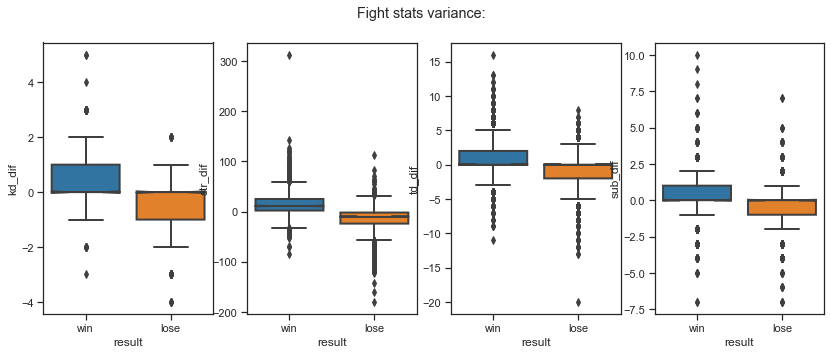

In [193]:
rows=1
cols=4
fig, axs = plt.subplots(rows,cols,figsize = (14,5))
fig.suptitle('Fight stats variance:')

sns.boxplot(ax=axs[0], x='result', y='kd_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[1], x='result', y='str_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[2], x='result', y='td_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[3], x='result', y='sub_dif', data=df,notch=True, showcaps=True)

fight stats contain significant varince > will be included as features

In [194]:
new_features = ['kd_dif','str_dif','td_dif','sub_dif']
for column in new_features:
    df[column] = (df[column] - np.mean(df[column]))/np.std(df[column])

df[new_features].head()    

,kd_dif,str_dif,td_dif,sub_dif
0,-0.001214,3.030277,0.016160,0.009864
1,-0.001214,-1.558783,-0.378812,0.009864
2,-0.001214,0.171518,0.806103,1.703673
3,-1.355760,-0.768863,0.016160,0.009864
4,-0.001214,0.434825,1.201074,-0.837040


In [195]:
features = []
new_features = ['kd_dif','str_dif','td_dif','sub_dif']

for feature in new_features:
    features.append(feature)
    df[feature] = df[feature]

print('+ Features:')    
print(features)    

+ Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = TakeDowns:
Exploring takedowns as feature using the following columns:
* <span style='color:blue'> **TD Avg.** </span> column
* <span style='color:blue'> **TD Acc.** </span> column
* <span style='color:blue'> **TD Def.** </span> column

In [199]:
tdf = (df[['result','fighter','opponent','f_td avg.','f_td acc.','f_td def.','o_td avg.','o_td acc.','o_td def.']]).copy()
tdf.head(3)

,result,fighter,opponent,f_td avg.,f_td acc.,f_td def.,o_td avg.,o_td acc.,o_td def.
0,win,Ciryl Gane,Tai Tuivasa,0.62,0.21,0.55,0.00,0.00,0.52
1,lose,Marvin Vettori,Robert Whittaker,1.89,0.44,0.74,0.82,0.37,0.84
2,win,Nassourdine Imavov,Joaquin Buckley,0.95,0.23,0.76,1.35,0.30,0.66


In [200]:
columns = ['td avg.','td acc.','td def.']
for column in columns:
    tdf[column + '_dif'] = tdf['f_' + column] - tdf['o_' + column]
    tdf[column + '_dif'] = (tdf[column + '_dif'] - np.mean(tdf[column + '_dif']))/np.std(tdf[column + '_dif'])
    
tdf = tdf[['result','td avg._dif','td acc._dif','td def._dif']]   
tdf.head()

,result,td avg._dif,td acc._dif,td def._dif
0,win,0.367383,0.737850,0.104590
1,lose,0.618005,0.249333,-0.330071
2,win,-0.200694,-0.239183,0.338638
3,lose,0.629144,0.214439,-0.129458
4,win,1.692895,2.098718,2.010413


<AxesSubplot:xlabel='result', ylabel='td avg._dif'>

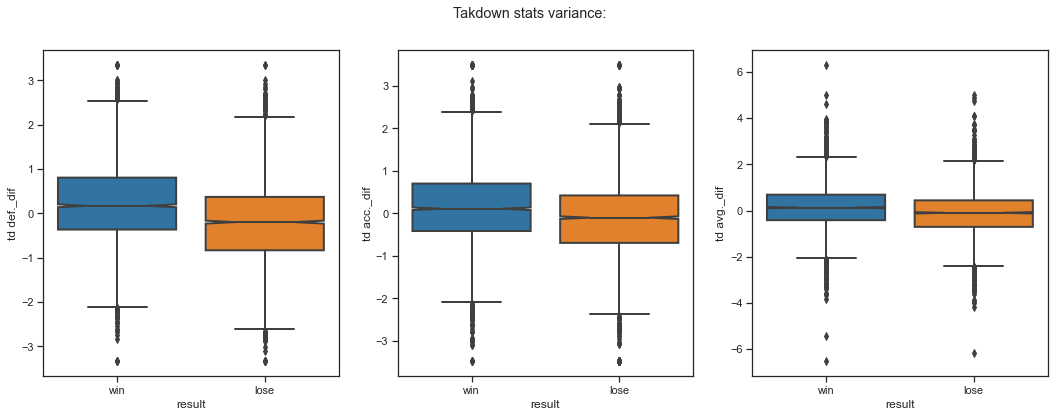

In [201]:
rows=1
cols=3
fig, axs = plt.subplots(rows,cols,figsize = (18,6))
fig.suptitle('Takdown stats variance:')

sns.boxplot(ax=axs[0], x='result', y='td def._dif', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[1], x='result', y='td acc._dif', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[2], x='result', y='td avg._dif', data=tdf,notch=True, showcaps=True)

takedowns statistics contain variance > will be included as features

In [202]:
new_features = tdf.columns[1:]

for feature in new_features:
    features.append(feature)
    df[feature] = tdf[feature]

print('Features:')    
print(features)    

Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Submissions:
Exploring submissions as feature using the following columns:
* <span style='color:blue'> **Sub. Avg.** </span> column = average submission attempts

In [203]:
columns = ['result','fighter', 'opponent','f_sub. avg.','o_sub. avg.']
sub_df = (df[columns]).copy()
sub_df.head(3)

,result,fighter,opponent,f_sub. avg.,o_sub. avg.
0,win,Ciryl Gane,Tai Tuivasa,0.5,0.0
1,lose,Marvin Vettori,Robert Whittaker,0.6,0.0
2,win,Nassourdine Imavov,Joaquin Buckley,2.4,0.0


In [204]:
column = 'sub. avg.'
sub_df[column + '_dif'] = sub_df['f_' + column] - sub_df['o_' + column]
    
sub_df = sub_df[['result', column+'_dif']]   
sub_df.head()

,result,sub. avg._dif
0,win,0.5
1,lose,0.6
2,win,2.4
3,lose,0.0
4,win,-1.0


<AxesSubplot:xlabel='result', ylabel='sub. avg._dif'>

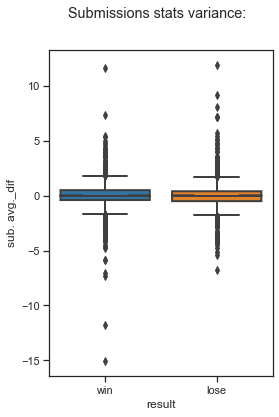

In [210]:
fig, axs = plt.subplots(figsize = (4,6))
fig.suptitle('Submissions stats variance:')
sns.boxplot( x='result', y='sub. avg._dif', data=sub_df, notch=True, showcaps=True)

it seems there is no impact of sub average on the fight outcome, 
i will check what is the case with fights that ended with submission:

In [207]:
mask = df['method'].str.contains('SUB:')
test_sub_df = (df.loc[mask, ['result','fighter','opponent','f_sub. avg.','o_sub. avg.']]).copy()
test_sub_df['sub. avg._dif'] = test_sub_df['f_sub. avg.'] - test_sub_df['o_sub. avg.']
test_sub_df.head()

,result,fighter,opponent,f_sub. avg.,o_sub. avg.,sub. avg._dif
11,lose,Ailin Perez,Stephanie Egger,0.0,0.8,-0.8
28,lose,Pete Williams,Frank Mir,0.9,2.0,-1.1
29,win,Matt Serra,Kelly Dullanty,0.9,0.0,0.9
32,win,Jacare Souza,Chris Camozzi,1.3,0.5,0.8
36,win,Francisco Trinaldo,Mike Rio,0.5,1.0,-0.5


<AxesSubplot:xlabel='result', ylabel='sub. avg._dif'>

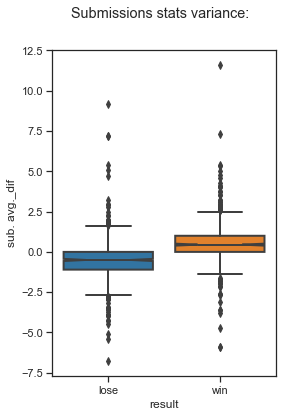

In [211]:
fig, axs = plt.subplots(figsize = (4,6))
fig.suptitle('Submissions stats variance:')
sns.boxplot( x='result', y='sub. avg._dif', data=test_sub_df, notch=True, showcaps=True)

after filtering only the fights that ended with submissions we see significant impact of "sub average", i will use it as a feature due to the fact that submission have big impact of how fighters fight(even though it might not end with sub)

In [212]:
column = 'sub. avg._dif'
sub_df[column] = (sub_df[column] - np.mean(sub_df[column]))/np.std(sub_df[column])
sub_df = sub_df[[column]] 

In [213]:
feature = 'sub. avg._dif'
features.append(feature)
df[feature] = sub_df[feature]
    
print(features)   

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Striking:

* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)

In [214]:
str_df = (df[['result','fighter','opponent','method','f_slpm','o_slpm','f_str. acc.','o_str. acc.','f_sapm','o_sapm','f_str. def','o_str. def','str_dif']]).copy()
str_df.head()

,result,fighter,opponent,method,f_slpm,o_slpm,f_str. acc.,o_str. acc.,f_sapm,o_sapm,f_str. def,o_str. def,str_dif
0,win,Ciryl Gane,Tai Tuivasa,KO/TKO:Punches,5.11,4.12,0.59,0.50,2.25,4.24,0.62,0.45,3.030277
1,lose,Marvin Vettori,Robert Whittaker,U-DEC:,4.20,4.48,0.44,0.42,3.58,3.26,0.59,0.61,-1.558783
2,win,Nassourdine Imavov,Joaquin Buckley,U-DEC:,4.08,3.61,0.54,0.32,2.43,3.42,0.62,0.54,0.171518
3,lose,Alessio Di Chirico,Roman Kopylov,KO/TKO:Punches,3.32,3.44,0.39,0.44,3.44,3.81,0.61,0.60,-0.768863
4,win,William Gomis,Jarno Errens,U-DEC:,2.13,1.33,0.45,0.37,1.33,2.13,0.62,0.54,0.434825


In [215]:
columns = ['slpm','str. acc.','sapm','str. def']
for column in columns:
    str_df[column + '_dif'] = str_df['f_' + column] - str_df['o_' + column]
    str_df[column + '_dif'] = (str_df[column + '_dif'] - np.mean(str_df[column + '_dif']))/np.std(str_df[column + '_dif'])
    
str_df = str_df[['result', columns[0] +'_dif',columns[1] +'_dif', columns[2] +'_dif', columns[3] +'_dif']]   
str_df.head()

,result,slpm_dif,str. acc._dif,sapm_dif,str. def_dif
0,win,0.630393,0.738157,-1.209225,1.422782
1,lose,-0.171131,0.171314,0.201202,-0.172641
2,win,0.302210,1.790865,-0.598650,0.667055
3,lose,-0.070152,-0.395529,-0.220094,0.079268
4,win,0.510480,0.657179,-0.482641,0.667055


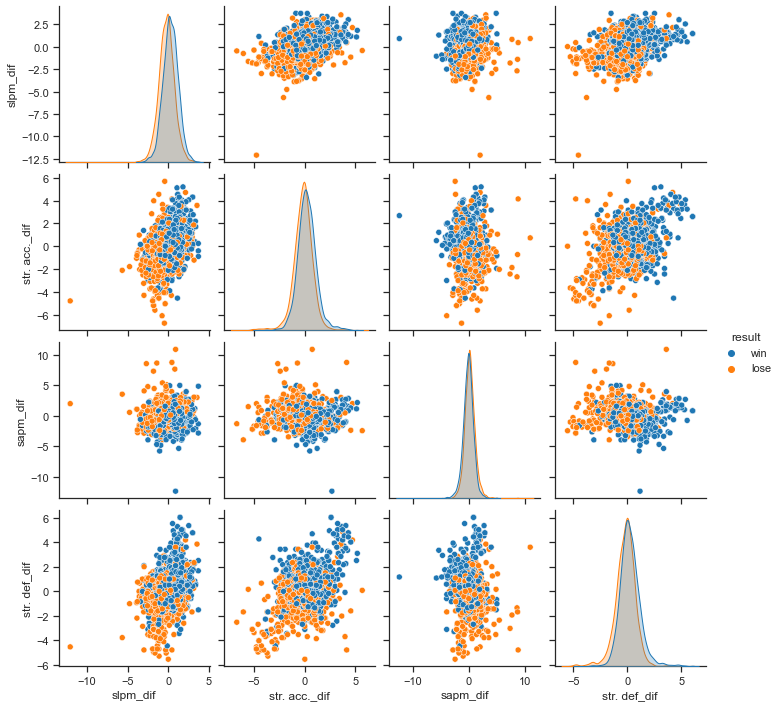

In [216]:
sns.pairplot(data=str_df, hue="result")

striking differences causing variance between fighters win & lose > will be included as features

In [217]:
new_features = str_df.columns[1:]

for feature in new_features:
    features.append(feature)
    df[feature] = str_df[feature]

print('Features:')    
print(features)  

Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Height:

In [218]:
hdf = (df[['result','fighter','opponent','method','weight class','f_height','o_height']]).copy()
hdf['height_df'] = hdf['f_height'] - hdf['o_height']
hdf['height_df'] = (hdf['height_df'] - np.mean(hdf['height_df']))/np.std(hdf['height_df'])
hdf.head(3)

,result,fighter,opponent,method,weight class,f_height,o_height,height_df
0,win,Ciryl Gane,Tai Tuivasa,KO/TKO:Punches,Heavyweight,193.04,187.96,0.788591
1,lose,Marvin Vettori,Robert Whittaker,U-DEC:,Middleweight,182.88,182.88,0.014190
2,win,Nassourdine Imavov,Joaquin Buckley,U-DEC:,Middleweight,190.50,177.80,1.950193


<AxesSubplot:xlabel='result', ylabel='height_df'>

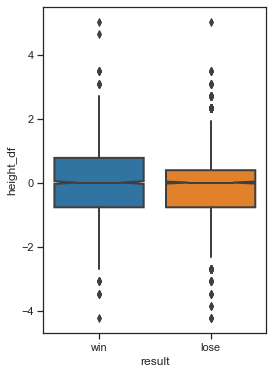

In [219]:
plt.figure(figsize = (4,6))
sns.boxplot(data=hdf, x='result', y='height_df',notch=True, showcaps=False)

height has no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = Reach:

In [220]:
rdf = (df[['result','fighter','opponent','method','weight class','f_reach','o_reach']]).copy()
rdf['reach_dif'] = rdf['f_reach'] - rdf['o_reach']
rdf['reach_dif'] = (rdf['reach_dif'] - np.mean(rdf['reach_dif']))/np.std(rdf['reach_dif'])
rdf.head(3)

,result,fighter,opponent,method,weight class,f_reach,o_reach,reach_dif
0,win,Ciryl Gane,Tai Tuivasa,KO/TKO:Punches,Heavyweight,205.74,190.50,1.845891
1,lose,Marvin Vettori,Robert Whittaker,U-DEC:,Middleweight,187.96,185.42,0.312763
2,win,Nassourdine Imavov,Joaquin Buckley,U-DEC:,Middleweight,190.50,193.04,-0.300489


<AxesSubplot:xlabel='result', ylabel='reach_dif'>

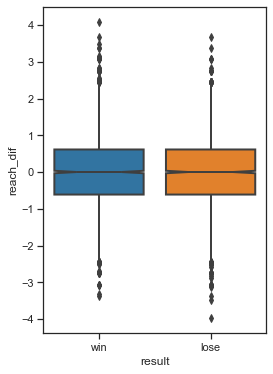

In [221]:
plt.figure(figsize = (4,6))
sns.boxplot(data=rdf, x='result', y='reach_dif',notch=True, showcaps=False)

no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = stance:

In [222]:
stance_df = (df[['result','fighter','opponent','f_stance','o_stance']]).copy()
stance_df['stance_combo'] = stance_df['f_stance'] + ':' + stance_df['o_stance']
stance_df.head(3)

,result,fighter,opponent,f_stance,o_stance,stance_combo
0,win,Ciryl Gane,Tai Tuivasa,Orthodox,Southpaw,Orthodox:Southpaw
1,lose,Marvin Vettori,Robert Whittaker,Southpaw,Orthodox,Southpaw:Orthodox
2,win,Nassourdine Imavov,Joaquin Buckley,Orthodox,Southpaw,Orthodox:Southpaw


### Functions setup:

In [223]:
def get_wins(combo, data=stance_df):

    data = data[(data.result=='win') & (data.stance_combo==combo)]
    return len(data)

In [224]:
def get_wins_ratio(combo, data=stance_df):
    
    combo_df = data[data.stance_combo==combo]
    return get_wins(combo, data=data)/len(combo_df)

In [225]:
stance_df['stance_win_ratio'] = None

for combo,i in zip(stance_df['stance_combo'],range(0,len(df))):
    stance_df.loc[i, 'stance_win_ratio'] = get_wins_ratio(combo)
    
stance_df.head(3)    

,result,fighter,opponent,f_stance,o_stance,stance_combo,stance_win_ratio
0,win,Ciryl Gane,Tai Tuivasa,Orthodox,Southpaw,Orthodox:Southpaw,0.471241
1,lose,Marvin Vettori,Robert Whittaker,Southpaw,Orthodox,Southpaw:Orthodox,0.545455
2,win,Nassourdine Imavov,Joaquin Buckley,Orthodox,Southpaw,Orthodox:Southpaw,0.471241


[Text(0, 0, '0.471241'),
 Text(0, 0, '0.545455'),
 Text(0, 0, '0.522727'),
 Text(0, 0, '0.495484'),
 Text(0, 0, '0.553846'),
 Text(0, 0, '0.491103'),
 Text(0, 0, '0.467742'),
 Text(0, 0, '0.439394'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0.444444'),
 Text(0, 0, '0.625'),
 Text(0, 0, '0'),
 Text(0, 0, '0.333333'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0')]

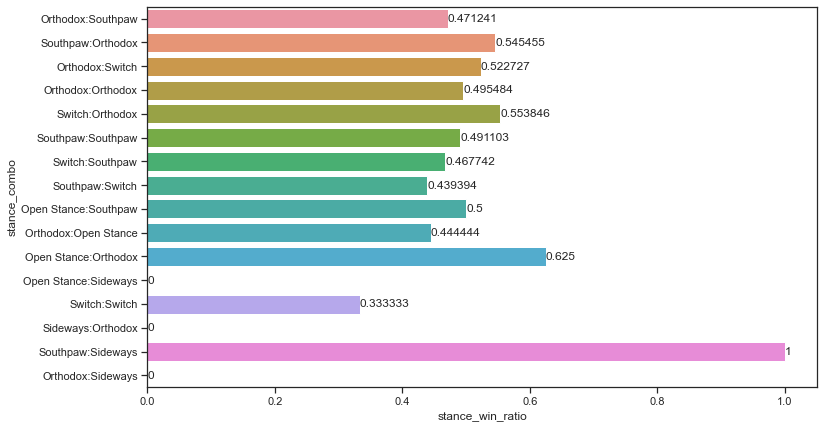

In [226]:
groupedvalues = stance_df.groupby('stance_combo').sum().reset_index()

plt.figure(figsize = (12,7))
ax = sns.barplot(data=stance_df, x="stance_win_ratio", y="stance_combo")
ax.bar_label(ax.containers[0])

* some stances gives significant edge ( >> 0.5) over its opponent stance,
* 1 or 0 stance_win_ratio is irrelevant (=only one time occured) so i will change it to 0.5 (=50:50 chance)

In [227]:
for i in range(0,len(stance_df)):
    
    if stance_df.loc[i,'stance_win_ratio'] == 1:
        stance_df.loc[i,'stance_win_ratio'] = 0.5
        
    if stance_df.loc[i,'stance_win_ratio'] == 0.0:
        stance_df.loc[i,'stance_win_ratio'] = 0.5 

# normalizing:
stance_df['stance_win_ratio'] = (stance_df['stance_win_ratio'] - np.mean(stance_df['stance_win_ratio']))/np.std(stance_df['stance_win_ratio'])        
stance_df.head(3)        

,result,fighter,opponent,f_stance,o_stance,stance_combo,stance_win_ratio
0,win,Ciryl Gane,Tai Tuivasa,Orthodox,Southpaw,Orthodox:Southpaw,-1.103479
1,lose,Marvin Vettori,Robert Whittaker,Southpaw,Orthodox,Southpaw:Orthodox,1.722088
2,win,Nassourdine Imavov,Joaquin Buckley,Orthodox,Southpaw,Orthodox:Southpaw,-1.103479


[Text(0, 0, '-1.10348'),
 Text(0, 0, '1.72209'),
 Text(0, 0, '0.85678'),
 Text(0, 0, '-0.180473'),
 Text(0, 0, '2.04159'),
 Text(0, 0, '-0.34726'),
 Text(0, 0, '-1.23671'),
 Text(0, 0, '-2.31602'),
 Text(0, 0, '-0.00852775'),
 Text(0, 0, '-2.12373'),
 Text(0, 0, '4.75067'),
 Text(0, 0, '-0.00852775'),
 Text(0, 0, '-6.35412'),
 Text(0, 0, '-0.00852775'),
 Text(0, 0, '-0.00852775'),
 Text(0, 0, '-0.00852775')]

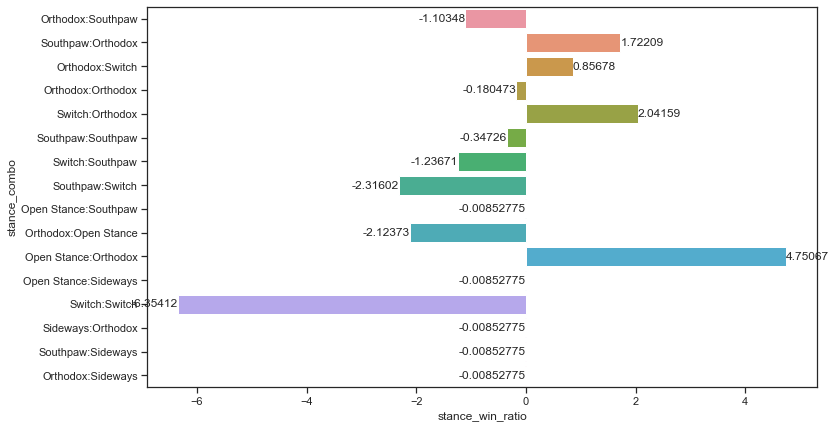

In [228]:
groupedvalues = stance_df.groupby('stance_combo').sum().reset_index()

plt.figure(figsize = (12,7))
ax = sns.barplot(data=stance_df, x="stance_win_ratio", y="stance_combo")
ax.bar_label(ax.containers[0])

In [229]:
features.append('stance_win_ratio')
df['stance_win_ratio'] = stance_df['stance_win_ratio']
print(features)

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif', 'stance_win_ratio']


# <span style='color:green'> **[done]** </span> Feature Engineering = Win/Lose streak:

In [230]:
win_df = (df[['result','fighter','opponent','f_win_perc','o_win_perc','f_win_strk','o_win_strk','f_lose_strk','o_lose_strk']]).copy()
win_df.head(3)

,result,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk
0,win,Ciryl Gane,Tai Tuivasa,0.89,0.67,0,5,1,0
1,lose,Marvin Vettori,Robert Whittaker,0.67,0.79,1,0,0,1
2,win,Nassourdine Imavov,Joaquin Buckley,0.80,0.62,2,3,0,0


In [231]:
columns = ['win_perc','win_strk','lose_strk']

for column in columns:
    win_df[column + '_dif'] = win_df['f_' + column] - win_df['o_' + column]
    win_df[column + '_dif'] = (win_df[column + '_dif'] - np.mean(win_df[column + '_dif']))/np.std(win_df[column + '_dif'])
    
win_df = win_df[['result', columns[0] +'_dif',columns[1] +'_dif', columns[2] +'_dif']]   
win_df.head()

,result,win_perc_dif,win_strk_dif,lose_strk_dif
0,win,0.437791,-2.845566,1.079323
1,lose,-0.234832,0.596560,-1.076104
2,win,0.358659,-0.550816,0.001609
3,lose,0.061913,0.022872,-1.076104
4,win,1.980868,0.022872,0.001609


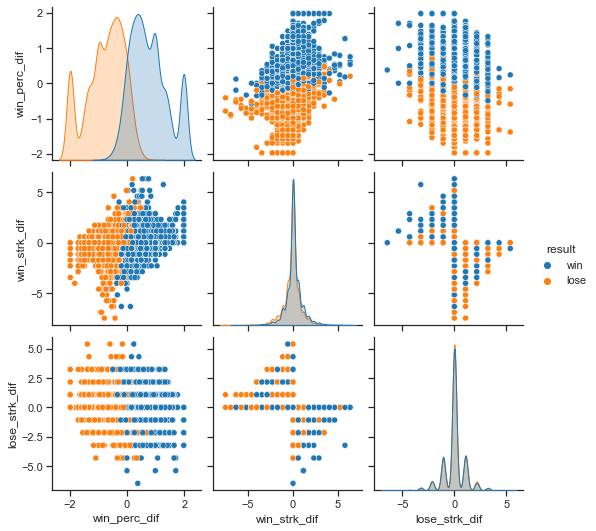

In [232]:
sns.pairplot(data=win_df, hue="result")

we can see very significant variance > might be the strongest predictor for fight's winner > will be included as features

In [233]:
new_features = win_df.columns[1:]
for feature in new_features:
    features.append(feature)
    df[feature] = win_df[feature]
    
print(features)    

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif']


# <span style='color:green'> **[done]** </span> saving Features data file:

In [234]:
df.head(2)

,result,weight class,method,round,time,date,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,win,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,0.89,0.67,0,5,1,0,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0,-0.001214,3.030277,0.016160,0.009864,0.367383,0.737850,0.104590,0.487884,0.630393,0.738157,-1.209225,1.422782,-1.103479,0.437791,-2.845566,1.079323
1,lose,Middleweight,U-DEC:,3,5:00,2022-09-03,Marvin Vettori,Robert Whittaker,0.67,0.79,1,0,0,1,15.000,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,-0.001214,-1.558783,-0.378812,0.009864,0.618005,0.249333,-0.330071,0.583092,-0.171131,0.171314,0.201202,-0.172641,1.722088,-0.234832,0.596560,-1.076104


In [235]:
columns = ['result','fighter','opponent','date','weight class','method',]
for feature in features:
    columns.append(feature)

final_df = df[columns]   
final_df.head(10)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,win,Ciryl Gane,Tai Tuivasa,2022-09-03,Heavyweight,KO/TKO:Punches,-0.001214,3.030277,0.016160,0.009864,0.367383,0.737850,0.104590,0.487884,0.630393,0.738157,-1.209225,1.422782,-1.103479,0.437791,-2.845566,1.079323
1,lose,Marvin Vettori,Robert Whittaker,2022-09-03,Middleweight,U-DEC:,-0.001214,-1.558783,-0.378812,0.009864,0.618005,0.249333,-0.330071,0.583092,-0.171131,0.171314,0.201202,-0.172641,1.722088,-0.234832,0.596560,-1.076104
2,win,Nassourdine Imavov,Joaquin Buckley,2022-09-03,Middleweight,U-DEC:,-0.001214,0.171518,0.806103,1.703673,-0.200694,-0.239183,0.338638,2.296840,0.302210,1.790865,-0.598650,0.667055,-1.103479,0.358659,-0.550816,0.001609
3,lose,Alessio Di Chirico,Roman Kopylov,2022-09-03,Middleweight,KO/TKO:Punches,-1.355760,-0.768863,0.016160,0.009864,0.629144,0.214439,-0.129458,0.011842,-0.070152,-0.395529,-0.220094,0.079268,-1.103479,0.061913,0.022872,-1.076104
4,win,William Gomis,Jarno Errens,2022-09-03,Featherweight,U-DEC:,-0.001214,0.434825,1.201074,-0.837040,1.692895,2.098718,2.010413,-0.940240,0.510480,0.657179,-0.482641,0.667055,1.722088,1.980868,0.022872,0.001609
5,win,Nathaniel Wood,Charles Jourdain,2022-09-03,Featherweight,U-DEC:,-0.001214,0.397210,1.596046,0.009864,0.963306,1.331049,0.840171,0.107051,0.321143,-0.071619,-0.079662,-0.088672,0.85678,0.615838,0.596560,-1.076104
6,lose,Dustin Stoltzfus,Abus Magomedov,2022-09-03,Middleweight,KO/TKO:Punches,-1.355760,-0.279865,0.016160,0.009864,1.002292,1.226367,1.542316,0.487884,-12.080392,-4.768317,2.008504,-4.539062,-0.180473,-1.580079,0.596560,0.001609
7,lose,John Makdessi,Nasrat Haqparast,2022-09-03,Lightweight,U-DEC:,-1.355760,0.321979,-0.773783,0.009864,-0.178416,-1.041747,0.238332,0.011842,0.295899,0.495224,-0.409372,0.331177,-1.103479,-0.037002,0.596560,-2.153818
8,win,Fares Ziam,Michal Figlak,2022-09-03,Lightweight,U-DEC:,-0.001214,1.187130,0.806103,0.009864,-0.000196,0.179545,0.438945,0.011842,0.415812,1.224022,-1.398503,1.842630,-0.180473,1.189546,0.022872,1.079323
9,lose,Gabriel Miranda,Benoit Saint Denis,2022-09-03,Lightweight,KO/TKO:Punch,-4.064854,-0.844094,0.016160,0.009864,-0.261957,0.109757,-2.837732,-1.035448,-0.354156,0.171314,0.769037,-0.340580,-1.103479,-1.322899,-0.550816,0.001609


In [236]:
final_df.to_csv('data/ufc_data_features.csv')

In [ ]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>